# ***Hyperparameter Tuning***




 Hyperparameter Tuning (Grid + Randomized) Completed!


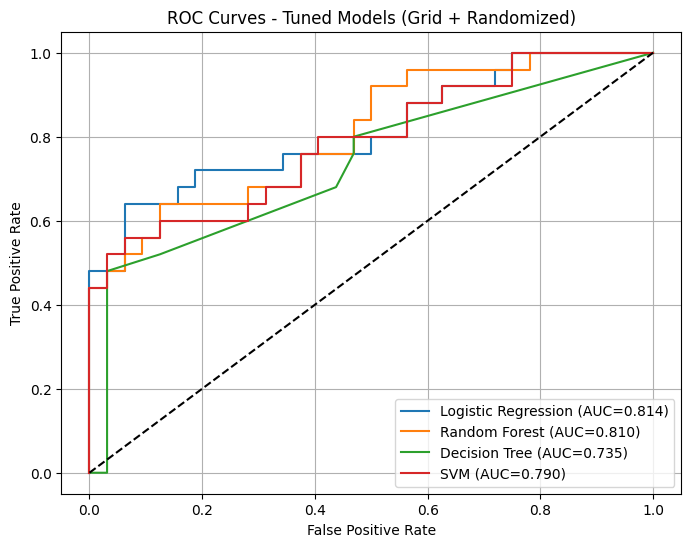

 Logistic Regression 
              precision    recall  f1-score   support

           0      0.788     0.812     0.800        32
           1      0.750     0.720     0.735        25

    accuracy                          0.772        57
   macro avg      0.769     0.766     0.767        57
weighted avg      0.771     0.772     0.771        57

 Random Forest 
              precision    recall  f1-score   support

           0      0.727     0.750     0.738        32
           1      0.667     0.640     0.653        25

    accuracy                          0.702        57
   macro avg      0.697     0.695     0.696        57
weighted avg      0.701     0.702     0.701        57

 Decision Tree 
              precision    recall  f1-score   support

           0      0.692     0.562     0.621        32
           1      0.548     0.680     0.607        25

    accuracy                          0.614        57
   macro avg      0.620     0.621     0.614        57
weighted avg      0.

In [ ]:
# SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define scorer
f1_scorer = make_scorer(f1_score)

# Hyperparameters
grid_params = {
    'Logistic Regression': {'C':[0.01, 0.1, 1, 10], 'solver':['liblinear','lbfgs']},
    'Random Forest': {'n_estimators':[50,100], 'max_depth':[3,5,None], 'min_samples_split':[2,5], 'min_samples_leaf':[1,2]}
}

rand_params = {
    'Decision Tree': {'max_depth':[3,5,7], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]},
    'SVM': {'C':[0.1,1,10], 'kernel':['linear','rbf'], 'gamma':['scale','auto']}
}

# Base Models
models_base = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

tuned_models = {}

# GridSearchCV
for name in grid_params:
    grid = GridSearchCV(models_base[name], param_grid=grid_params[name], cv=3,
                        scoring=f1_scorer, n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    tuned_models[name] = grid.best_estimator_

# RandomizedSearchCV
for name in rand_params:
    rand = RandomizedSearchCV(models_base[name], param_distributions=rand_params[name],
                              n_iter=5, cv=3, scoring=f1_scorer, random_state=42, n_jobs=-1)
    rand.fit(X_train_res, y_train_res)
    tuned_models[name] = rand.best_estimator_

print(" Hyperparameter Tuning (Grid + Randomized) Completed!")

# Evaluate Models
results = []
plt.figure(figsize=(8,6))

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec,
                    'Recall': rec, 'F1-score': f1, 'AUC': auc_score})

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC={auc_score:.3f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Tuned Models (Grid + Randomized)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#  Results Table
results_df = pd.DataFrame(results)
results_df = results_df[['Model','Accuracy','Precision','Recall','F1-score','AUC']]
results_df

# Classification Report
for name, model in tuned_models.items():
    print(f" {name} ")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))

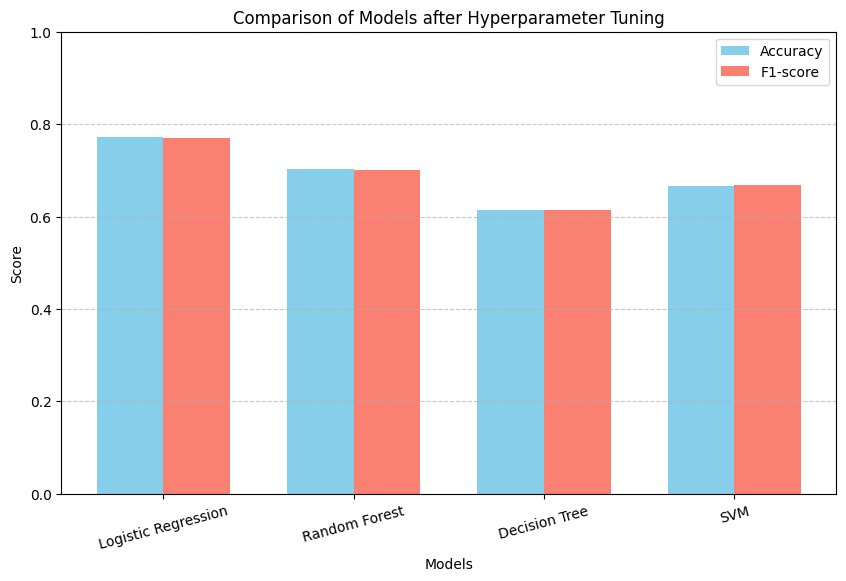

In [ ]:
# Result in DataFrame
results_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM'],
    'Accuracy': [0.772, 0.702, 0.614, 0.667],
    'F1-score': [0.771, 0.701, 0.615, 0.668]
})

# Plot
plt.figure(figsize=(10,6))
bar_width = 0.35
index = range(len(results_compare))

plt.bar(index, results_compare['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar([i + bar_width for i in index], results_compare['F1-score'], bar_width, label='F1-score', color='salmon')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Models after Hyperparameter Tuning')
plt.xticks([i + bar_width/2 for i in index], results_compare['Model'], rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
